In [1]:
import duckdb
import pandas as pd

# Connect to the duckdb file
con = duckdb.connect("../data/warehouse.duckdb")

In [2]:
# List tables in the DuckDB file
con.execute("SHOW ALL TABLES").fetchdf()

,database,schema,name,column_names,column_types,temporary
0,warehouse,prod,sales,"[chargedate, meterid, chargedate_str, loc, res...","[DATE, BIGINT, VARCHAR, VARCHAR, VARCHAR, VARC...",False


In [3]:
df = con.execute("SELECT * FROM prod.sales").fetchdf()
df.head()

,chargedate,meterid,chargedate_str,loc,res,month,month_str,kwh,year,ghc,paymoney
0,2019-02-15,1,15-Feb-2019,Techiman [13],N-Resid [0],Feb-19,01-Feb-2019,14.2,2019,23.1705,140.0
1,2019-03-11,1,11-Mar-2019,Techiman [13],N-Resid [0],Mar-19,01-Mar-2019,57.4,2019,38.8886,40.0
2,2019-04-20,1,20-Apr-2019,Techiman [13],N-Resid [0],Apr-19,01-Apr-2019,57.4,2019,38.8886,20.0
3,2019-05-28,1,28-May-2019,Techiman [13],N-Resid [0],May-19,01-May-2019,57.4,2019,38.8886,20.0
4,2019-06-25,1,25-Jun-2019,Techiman [13],N-Resid [0],Jun-19,01-Jun-2019,57.4,2019,38.8886,20.0


In [4]:
df.isnull().sum()

chargedate            0
meterid               0
chargedate_str        0
loc                   0
res                   0
month                 0
month_str             0
kwh               60943
year                  0
ghc                   0
paymoney          39318
dtype: int64

In [5]:
len(df)


2867046

In [6]:
df.isnull().sum()[df.isnull().sum() > 0]

kwh         60943
paymoney    39318
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,chargedate,meterid,chargedate_str,loc,res,month,month_str,kwh,year,ghc,paymoney
54,2015-06-30,2,30-Jun-2015,Techiman [13],Resid [1],Jun-15,01-Jun-2015,206.01,2015,79.9775,NaN
404,2013-09-06,6,06-Sep-2013,Techiman [13],Resid [1],Sep-13,01-Sep-2013,438.99,2013,78.2502,NaN
406,2013-11-07,6,07-Nov-2013,Techiman [13],Resid [1],Nov-13,01-Nov-2013,NaN,2013,216.9074,NaN
690,2013-10-29,9,29-Oct-2013,Techiman [13],Resid [1],Oct-13,01-Oct-2013,NaN,2013,206.9131,30.0
749,2018-11-23,9,23-Nov-2018,Techiman [13],Resid [1],Nov-18,01-Nov-2018,NaN,2018,3.5442,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2866844,2017-12-01,69057,01-Dec-2017,Abofour [1],Resid [1],Dec-17,01-Dec-2017,400.00,2017,256.3200,NaN
2866845,2018-01-02,69057,02-Jan-2018,Abofour [1],Resid [1],Jan-18,01-Jan-2018,305.40,2018,173.6585,NaN
2866900,2018-02-25,69059,25-Feb-2018,Abofour [1],Resid [1],Feb-18,01-Feb-2018,NaN,2018,8.0164,10.0
2866906,2018-08-17,69059,17-Aug-2018,Abofour [1],Resid [1],Aug-18,01-Aug-2018,NaN,2018,3.5442,5.0


In [8]:
# Drop 'paymoney' and 'ghc' columns from the DataFrame
df = df.drop(['paymoney', 'ghc'], axis=1)
df.head()

,chargedate,meterid,chargedate_str,loc,res,month,month_str,kwh,year
0,2019-02-15,1,15-Feb-2019,Techiman [13],N-Resid [0],Feb-19,01-Feb-2019,14.2,2019
1,2019-03-11,1,11-Mar-2019,Techiman [13],N-Resid [0],Mar-19,01-Mar-2019,57.4,2019
2,2019-04-20,1,20-Apr-2019,Techiman [13],N-Resid [0],Apr-19,01-Apr-2019,57.4,2019
3,2019-05-28,1,28-May-2019,Techiman [13],N-Resid [0],May-19,01-May-2019,57.4,2019
4,2019-06-25,1,25-Jun-2019,Techiman [13],N-Resid [0],Jun-19,01-Jun-2019,57.4,2019


In [9]:
# Drop rows where 'kwh' is missing
df = df.dropna(subset=['kwh'])
len(df)

2806103

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2806103 entries, 0 to 2867045
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   chargedate      datetime64[us]
 1   meterid         int64         
 2   chargedate_str  object        
 3   loc             object        
 4   res             object        
 5   month           object        
 6   month_str       object        
 7   kwh             float64       
 8   year            int64         
dtypes: datetime64[us](1), float64(1), int64(2), object(5)
memory usage: 214.1+ MB


In [11]:
# Drop redundant columns
df = df.drop(['chargedate_str', 'month_str', 'month'], axis=1)

# Convert text columns to category (saves memory and helps in ML preprocessing)
df['loc'] = df['loc'].astype('category')
df['res'] = df['res'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2806103 entries, 0 to 2867045
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   chargedate  datetime64[us]
 1   meterid     int64         
 2   loc         category      
 3   res         category      
 4   kwh         float64       
 5   year        int64         
dtypes: category(2), datetime64[us](1), float64(1), int64(2)
memory usage: 112.4 MB


In [13]:
# Extract time-based features
df['month_num'] = df['chargedate'].dt.month
df['weekday'] = df['chargedate'].dt.weekday
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [14]:
df.head()

,chargedate,meterid,loc,res,kwh,year,month_num,weekday,is_weekend
0,2019-02-15,1,Techiman [13],N-Resid [0],14.2,2019,2,4,0
1,2019-03-11,1,Techiman [13],N-Resid [0],57.4,2019,3,0,0
2,2019-04-20,1,Techiman [13],N-Resid [0],57.4,2019,4,5,1
3,2019-05-28,1,Techiman [13],N-Resid [0],57.4,2019,5,1,0
4,2019-06-25,1,Techiman [13],N-Resid [0],57.4,2019,6,1,0


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\859152536.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='chargedate')['kwh'].sum()


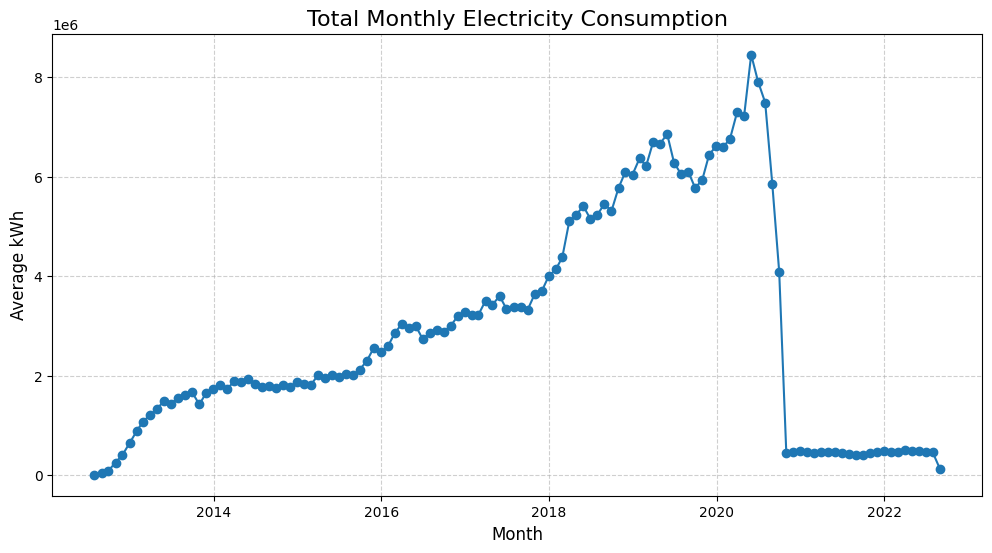

In [15]:
import matplotlib.pyplot as plt

# Ensure data is sorted by date
df = df.sort_values('chargedate')

# Group by month and compute mean kWh
df_monthly = df.resample('M', on='chargedate')['kwh'].sum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-')

plt.title('Total Monthly Electricity Consumption', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average kWh', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\2712759175.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='chargedate')['kwh'].mean()


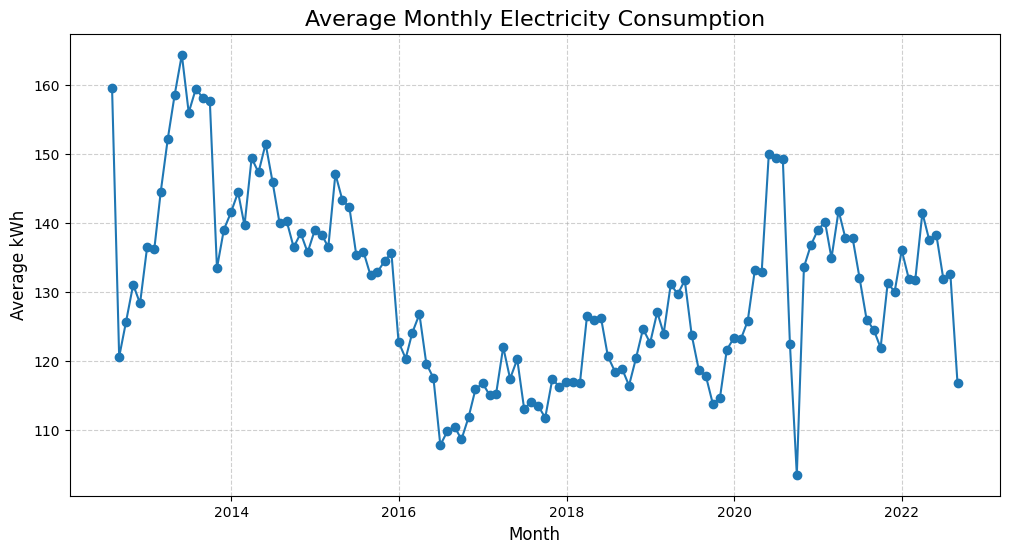

In [16]:
import matplotlib.pyplot as plt

# Ensure data is sorted by date
df = df.sort_values('chargedate')

# Group by month and compute mean kWh
df_monthly = df.resample('M', on='chargedate')['kwh'].mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly.values, marker='o', linestyle='-')

plt.title('Average Monthly Electricity Consumption', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average kWh', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\3856331435.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  unique_meters_per_month = df.resample('M', on='chargedate')['meterid'].nunique()


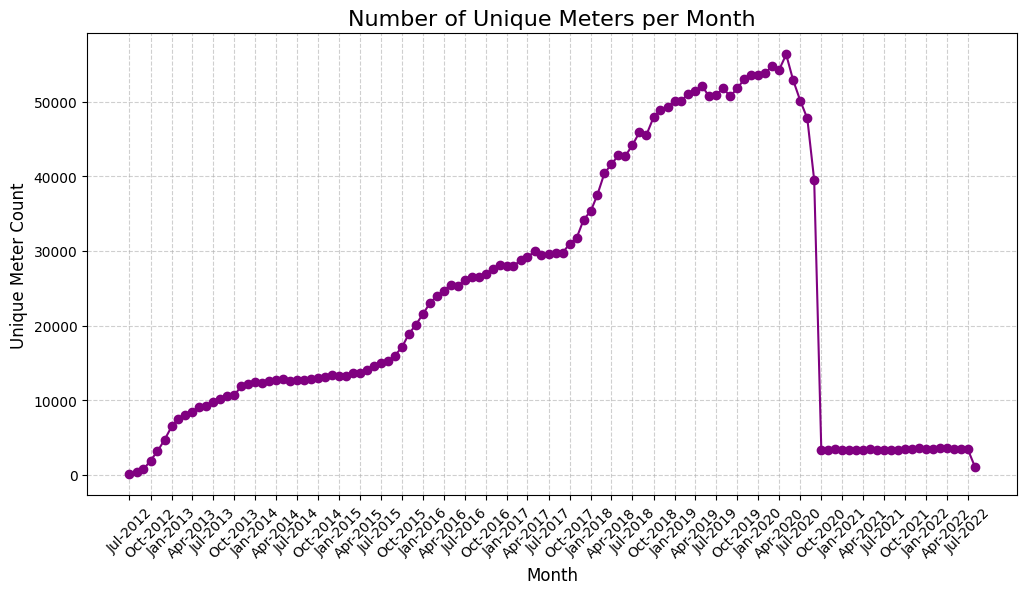

In [17]:
import matplotlib.pyplot as plt

# Ensure data is sorted by date
df = df.sort_values('chargedate')

# Group by month (using resample) and count unique meter IDs
unique_meters_per_month = df.resample('M', on='chargedate')['meterid'].nunique()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(unique_meters_per_month.index, unique_meters_per_month.values, marker='o', color='purple')

plt.title('Number of Unique Meters per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Meter Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: format x-axis with readable month labels
plt.xticks(unique_meters_per_month.index[::3], 
           unique_meters_per_month.index.strftime('%b-%Y')[::3], 
           rotation=45)

plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\2433803606.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby([pd.Grouper(key='chargedate', freq='M'), 'loc'])['meterid']
C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\2433803606.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby([pd.Grouper(key='chargedate', freq='M'), 'loc'])['meterid']


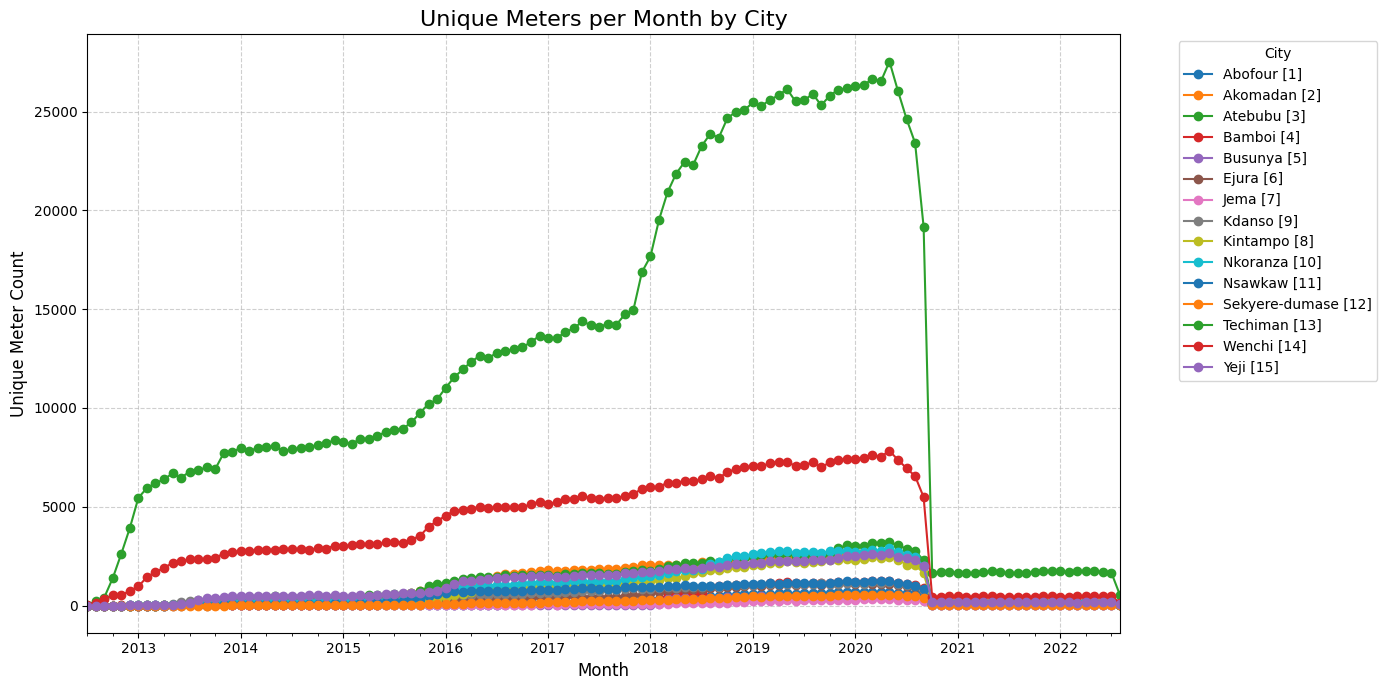

In [18]:
import matplotlib.pyplot as plt

# Group by month and location, count unique meters
unique_meters_by_city = (
    df.groupby([pd.Grouper(key='chargedate', freq='M'), 'loc'])['meterid']
      .nunique()
      .reset_index()
)

# Pivot for easier plotting (each city becomes a column)
unique_meters_pivot = unique_meters_by_city.pivot(index='chargedate', columns='loc', values='meterid')

# Plot
plt.figure(figsize=(14,7))
unique_meters_pivot.plot(ax=plt.gca(), marker='o')

plt.title('Unique Meters per Month by City', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Unique Meter Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [25]:
grouped = df.groupby('meterid')

In [26]:
grouped.get_group(1001).head()


,chargedate,meterid,loc,res,kwh,year,month_num,weekday,is_weekend
79669,2012-10-11,1001,Techiman [13],Resid [1],346.41,2012,10,3,0
79670,2012-11-23,1001,Techiman [13],Resid [1],196.25,2012,11,4,0
79671,2012-12-18,1001,Techiman [13],Resid [1],196.25,2012,12,1,0
79672,2013-01-30,1001,Techiman [13],Resid [1],386.44,2013,1,2,0
79673,2013-03-04,1001,Techiman [13],Resid [1],322.27,2013,3,0,0


In [29]:
df_sorted = df.groupby('meterid').apply(lambda x: x.sort_values('chargedate'))

C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\335210285.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sorted = df.groupby('meterid').apply(lambda x: x.sort_values('chargedate'))


In [30]:
df_sorted

chargedate  meterid            loc          res    kwh  year  \
meterid                                                                        
1       0       2019-02-15        1  Techiman [13]  N-Resid [0]   14.2  2019   
        1       2019-03-11        1  Techiman [13]  N-Resid [0]   57.4  2019   
        2       2019-04-20        1  Techiman [13]  N-Resid [0]   57.4  2019   
        3       2019-05-28        1  Techiman [13]  N-Resid [0]   57.4  2019   
        4       2019-06-25        1  Techiman [13]  N-Resid [0]   57.4  2019   
...                    ...      ...            ...          ...    ...   ...   
69065   2867041 2020-05-06    69065    Abofour [1]    Resid [1]  133.4  2020   
        2867042 2020-06-06    69065    Abofour [1]    Resid [1]  194.8  2020   
        2867043 2020-07-02    69065    Abofour [1]    Resid [1]  174.4  2020   
        2867044 2020-08-11    69065    Abofour [1]    Resid [1]  123.1  2020   
        2867045 2020-09-01    69065    Abofour [1]    Resid [1]   46.5  2020   

                 month_num  weekday  is_weekend  
meterid                                          
1       0                2        4           0  
        1                3        0           0  
        2                4        5           1  
        3                5        1           0  
        4                6        1           0  
...                    ...      ...         ...  
69065   2867041          5        2           0  
        2867042          6        5           1  
        2867043          7        3           0  
        2867044          8        1           0  
        2867045          9        1           0  

[2806103 rows x 9 columns]

<Axes: title={'center': 'Meter 1 Consumption'}, xlabel='chargedate'>

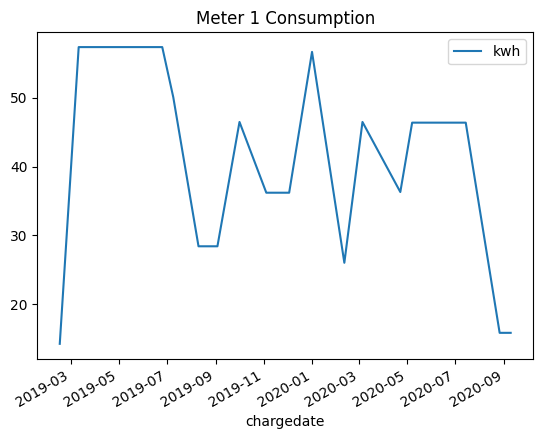

In [31]:
df[df['meterid']==1].plot(x='chargedate', y='kwh', title='Meter 1 Consumption')


In [32]:
df.groupby('meterid')['kwh'].std().describe()


count    68906.000000
mean        48.577269
std         69.508414
min          0.000000
25%         19.885763
50%         33.355600
75%         54.945964
max       1848.518547
Name: kwh, dtype: float64

In [33]:
group_lengths = df.groupby('meterid').size()


In [37]:
group_lengths

meterid
1        20
2        98
3        84
4        92
5        97
         ..
69061    27
69062    32
69063    22
69064    18
69065     7
Length: 69016, dtype: int64

In [38]:
df_reduced = df[df['chargedate'] <= '2020-07-30']

In [39]:
df_reduced.head()

,chargedate,meterid,loc,res,kwh,year,month_num,weekday,is_weekend
11026,2012-07-17,134,Techiman [13],N-Resid [0],23.49,2012,7,1,0
10656,2012-07-18,130,Techiman [13],Resid [1],45.24,2012,7,2,0
10845,2012-07-18,132,Techiman [13],Resid [1],45.24,2012,7,2,0
10479,2012-07-19,128,Techiman [13],N-Resid [0],18.49,2012,7,3,0
10752,2012-07-20,131,Techiman [13],N-Resid [0],52.87,2012,7,4,0


In [40]:
df_reduced.corr(numeric_only=True)['kwh'].sort_values(ascending=False)

kwh           1.000000
meterid       0.030402
is_weekend    0.006262
weekday       0.003627
month_num    -0.014076
year         -0.014890
Name: kwh, dtype: float64

In [41]:
df_reduced.groupby('loc')['kwh'].mean().sort_values(ascending=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\1336586596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reduced.groupby('loc')['kwh'].mean().sort_values(ascending=False)


loc
Bamboi [4]             200.320709
Jema [7]               191.261800
Ejura [6]              182.143075
Sekyere-dumase [12]    167.639717
Abofour [1]            147.737793
Kintampo [8]           136.623555
Wenchi [14]            134.577644
Kdanso [9]             127.698996
Atebubu [3]            127.569918
Nsawkaw [11]           122.543381
Techiman [13]          121.814860
Nkoranza [10]          120.218509
Yeji [15]              115.531472
Busunya [5]            104.149245
Akomadan [2]            99.543802
Name: kwh, dtype: float64

In [42]:
df_reduced.groupby('res')['kwh'].mean().sort_values(ascending=False)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\39813100.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_reduced.groupby('res')['kwh'].mean().sort_values(ascending=False)


res
N-Resid [0]    174.004291
Resid [1]      114.244680
Name: kwh, dtype: float64

In [43]:
df_encoded = df_reduced.copy()

# Convert categories to numeric codes
for col in ['loc', 'res']:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Compute correlation
df_encoded.corr(numeric_only=True)['kwh'].sort_values(ascending=False)


kwh           1.000000
meterid       0.030402
is_weekend    0.006262
weekday       0.003627
loc          -0.008993
month_num    -0.014076
year         -0.014890
res          -0.150021
Name: kwh, dtype: float64

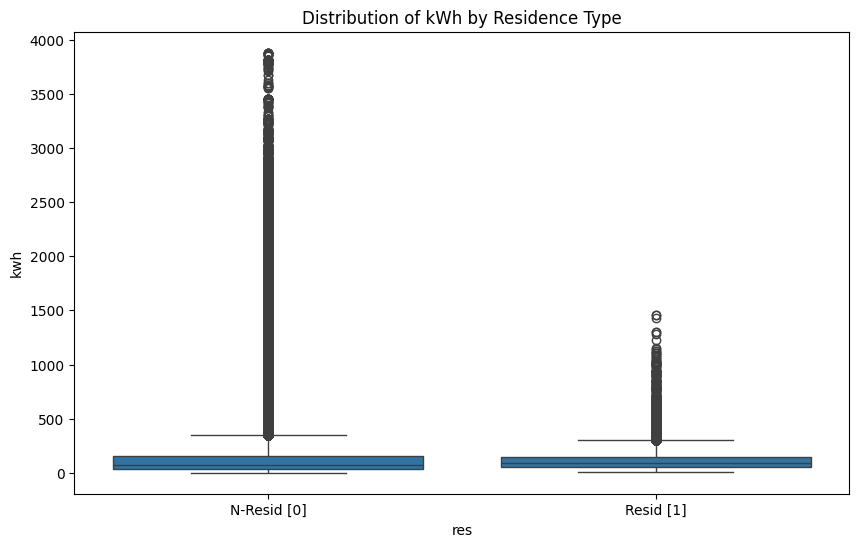

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df_reduced, x='res', y='kwh')
plt.title('Distribution of kWh by Residence Type')
plt.show()


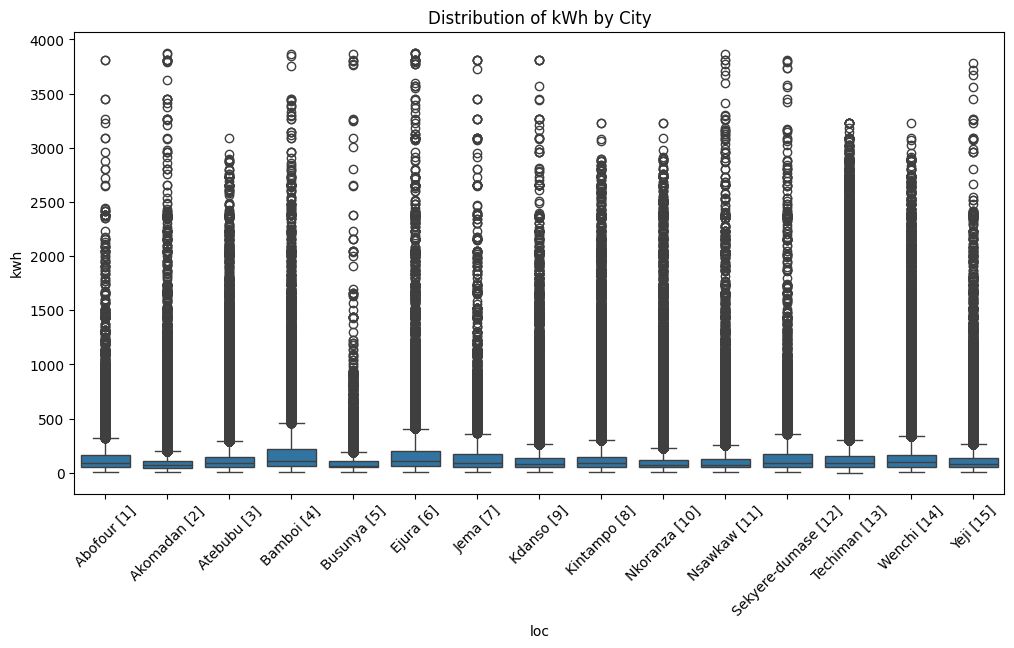

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_reduced, x='loc', y='kwh')
plt.xticks(rotation=45)
plt.title('Distribution of kWh by City')
plt.show()


In [47]:
df_reduced = df_reduced.drop('meterid', axis=1)
df_reduced.head()

,chargedate,loc,res,kwh,year,month_num,weekday,is_weekend
11026,2012-07-17,Techiman [13],N-Resid [0],23.49,2012,7,1,0
10656,2012-07-18,Techiman [13],Resid [1],45.24,2012,7,2,0
10845,2012-07-18,Techiman [13],Resid [1],45.24,2012,7,2,0
10479,2012-07-19,Techiman [13],N-Resid [0],18.49,2012,7,3,0
10752,2012-07-20,Techiman [13],N-Resid [0],52.87,2012,7,4,0


In [49]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_reduced.drop('kwh', axis=1)
y = df_reduced['kwh']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (2113354, 7)
Test shape: (528339, 7)


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Identify categorical and numeric columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")
print(f"R²: {r2_score(y_test, y_pred):.3f}")


MAE: 83.052
RMSE: 158.286
R²: 0.031


In [59]:
# keep only observed category combinations
df_monthly_total = (
    df_reduced
      .groupby(['year', 'month_num', 'loc', 'res'], observed=True, as_index=False)['kwh']
      .sum()
      .rename(columns={'kwh': 'total_kwh'})
)


In [60]:
df_monthly_total

,year,month_num,loc,res,total_kwh
0,2012,7,Techiman [13],N-Resid [0],2.732500e+02
1,2012,7,Techiman [13],Resid [1],1.628450e+03
2,2012,7,Wenchi [14],N-Resid [0],4.773400e+02
3,2012,7,Wenchi [14],Resid [1],4.005730e+03
4,2012,8,Bamboi [4],N-Resid [0],6.293300e+02
...,...,...,...,...,...
2668,2020,7,Techiman [13],Resid [1],2.752314e+06
2669,2020,7,Wenchi [14],N-Resid [0],2.640586e+05
2670,2020,7,Wenchi [14],Resid [1],7.783310e+05
2671,2020,7,Yeji [15],N-Resid [0],8.344460e+04


In [61]:
df_reduced['kwh'].sum()                         # total should be > 0
df_reduced.groupby('year', observed=True)['kwh'].sum().head()
df_monthly_total.head()


,year,month_num,loc,res,total_kwh
0,2012,7,Techiman [13],N-Resid [0],273.25
1,2012,7,Techiman [13],Resid [1],1628.45
2,2012,7,Wenchi [14],N-Resid [0],477.34
3,2012,7,Wenchi [14],Resid [1],4005.73
4,2012,8,Bamboi [4],N-Resid [0],629.33


In [62]:
df_monthly_total.groupby('loc')['total_kwh'].sum().sort_values(ascending=False).head(10)


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\3010708088.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly_total.groupby('loc')['total_kwh'].sum().sort_values(ascending=False).head(10)


loc
Techiman [13]    1.679951e+08
Wenchi [14]      5.947323e+07
Atebubu [3]      1.658447e+07
Yeji [15]        1.358696e+07
Nkoranza [10]    1.318977e+07
Kintampo [8]     1.220991e+07
Akomadan [2]     1.189250e+07
Kdanso [9]       7.584171e+06
Ejura [6]        7.544002e+06
Nsawkaw [11]     7.020633e+06
Name: total_kwh, dtype: float64

In [63]:
df_monthly_total.groupby('res')['total_kwh'].sum()


C:\Users\Asus\AppData\Local\Temp\ipykernel_26496\2363667871.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_monthly_total.groupby('res')['total_kwh'].sum()


res
N-Resid [0]    9.160317e+07
Resid [1]      2.416562e+08
Name: total_kwh, dtype: float64